# Multinomial Naive Bayes Classifier

### Getting the preprocessed data

There are 5846 rows and 3 columns
ham     4510
spam    1336
Name: Category, dtype: int64


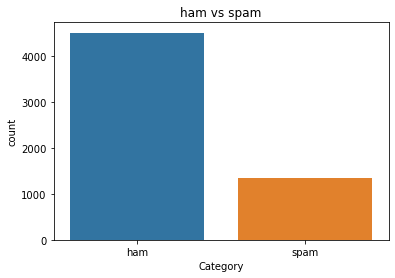

                                             Message  Label
0  go jurong point crazi avail bugi n great world...      0
1                              ok lar joke wif u oni      0
3                u dun say earli hor u c alreadi say      0
4               nah think goe usf live around though      0
6      even brother like speak treat like aid patent      0
X_train: (4676,)


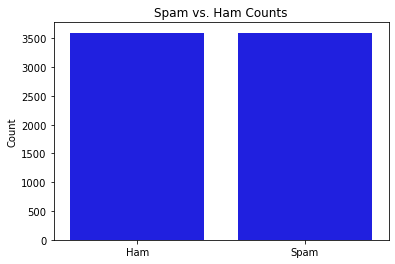

In [1]:
from utils import get_cleaned_data, generate_model_output
X_train, X_test, y_train, y_test, vocab_size, sentence_len = get_cleaned_data();

### Creating and training the base model

In [2]:
from sklearn.naive_bayes import MultinomialNB

# Define the Multinomial Naive Bayes classifier
mnb = MultinomialNB()

# Fit the model to the training data
mnb.fit(X_train, y_train)

# Test the model
y_pred = mnb.predict(X_test)

### Getting the results (scores) from our predictions

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       911
           1       0.60      0.69      0.64       259

    accuracy                           0.83      1170
   macro avg       0.75      0.78      0.76      1170
weighted avg       0.84      0.83      0.83      1170
 

Accuracy Score: 0.82991452991453


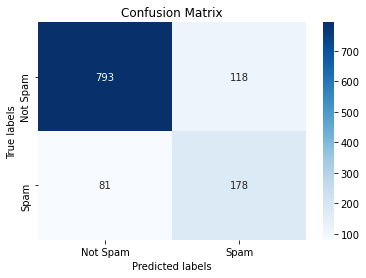

In [3]:
generate_model_output(y_test, y_pred)

### Cross-validation using GridSearchCV to Make Better Predictions

#### Finding the Best Parameters

In [4]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters that we want to tune
param_grid = {
    "alpha": [0.05, 0.1, 0.2, 0.5, 1.0, 2.0],
    "fit_prior": [True, False]
}

# Create a GridSearchCV object to perform cross validation over the hyperparameters
grid_search = GridSearchCV(mnb, param_grid)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print("GridSearchCV best params: ", grid_search.best_params_, "\n")

GridSearchCV best params:  {'alpha': 0.05, 'fit_prior': True} 



#### Creating New Multinomial Naive Bayes Model with GridSearchCV Best Params

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       911
           1       0.60      0.69      0.64       259

    accuracy                           0.83      1170
   macro avg       0.75      0.78      0.76      1170
weighted avg       0.84      0.83      0.83      1170
 

Accuracy Score: 0.82991452991453


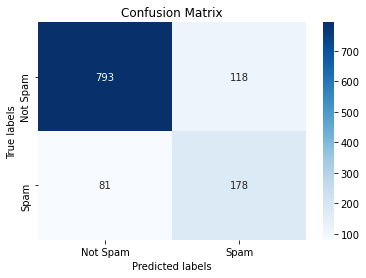

In [5]:
# Create a new MultinomialNB model with the best hyperparameters
best_model_grid_search = MultinomialNB(alpha=grid_search.best_params_["alpha"], fit_prior=grid_search.best_params_["fit_prior"])

# Fit the new model to the training data
best_model_grid_search.fit(X_train, y_train)

# Evaluating the model
generate_model_output(y_test, y_pred)

### Cross-validation using RandomSearchCV to Make Better Predictions

In [6]:
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters that we want to tune
param_distributions = {
    "alpha": [0.05, 0.1, 0.2, 0.5, 1.0, 2.0],
    "fit_prior": [True, False]
}

# Create a RandomSearchCV object to perform cross validation over the hyperparameters
randomized_search = RandomizedSearchCV(mnb, param_distributions)

# Fit the RandomSearchCV object to the training data
randomized_search.fit(X_train, y_train)

# Print the best hyperparameters found by RandomSearchCV
print("RandomizedSearchCV best params: ", randomized_search.best_params_, "\n")

RandomizedSearchCV best params:  {'fit_prior': True, 'alpha': 0.1} 



#### Creating New Multinomial Naive Bayes Model with RandomizedSearchCV Best Params

Classification Report
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       911
           1       0.60      0.69      0.64       259

    accuracy                           0.83      1170
   macro avg       0.75      0.78      0.76      1170
weighted avg       0.84      0.83      0.83      1170
 

Accuracy Score: 0.82991452991453


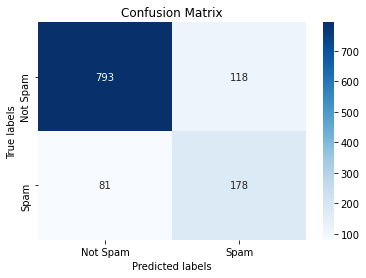

In [7]:
# Create a new MultinomialNB model with the best hyperparameters
best_model_random_search = MultinomialNB(alpha=randomized_search.best_params_["alpha"], fit_prior=randomized_search.best_params_["fit_prior"])

# Fit the new model to the training data
best_model_random_search.fit(X_train, y_train)

# Evaluating the model
generate_model_output(y_test, y_pred)